### Introduction to the Data Set

In [387]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99

In [388]:
#Read imports-85.data into a dataframe, cars, assigning columns parameter to predetermined column headers from the datasource.
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Numeric columns - features and target columns
Based on the preview of the cars dataset, the columns that could be used as features in a machine learning model could be: normalized_losses, wheel_base, length, width, height, curb_weight, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, and highway_mpg.
The price column should be the target column.

We usually can't have missing values in predictive modeling. Based on the data preview, there is missing information in the normalized-losses column. To clean this, we will replace these missing values and look for other missing values in numeric columns. We will also rescale all values to range from 0 to 1.

In [389]:
cars= cars.replace('?', np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [390]:
# look at columns and dtypes
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Column types in cars dataset

The table above shows all of the types for the cars columns. For the feature columns I would like to examine, I will need to convert the following to floats: normalized_losses, bore, stroke, horsepower, peak_rpm, and price.

In [391]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [392]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [393]:
# Change all columns to floats
# Make sure dtypes are all floats
numeric_cars = numeric_cars.astype(float)
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [394]:
numeric_cars.isnull().sum()
#It appears that 41 out of 204 rows in Normalized_Losses have missing values. I will choose to drop the column from the dataset, instead of using the avg value or dropping the rows.
#I will need to explore what other numeric columns have missing values.

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [395]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [396]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [397]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

The k-nearest neighbors algorithm uses the euclidean distance to determine the closest neighbor.
$$ Distance = \sqrt{{(q_1-p_1)}^2+{(q_2-p_2)}^2+...{(q_n-p_n)}^2} $$
Where q and p represent two rows and the subscript representing a column. However, each column have different scaling. For example, if we take row 2, and row 3. The peak RPM has a difference of 500, while the difference in width is 0.7. The algorithm will give extra weight towards the difference in peak RPM.
That is why it is important to normalize the dataset into a unit vector. After normalization we'll have values from -1 to 1. For more information on feature scaling visit https://en.wikipedia.org/wiki/Feature_scaling.
$$ x' = \frac{x - mean(x)}{x(max) - x(min)}$$
In pandas this would be:
$$ df' = \frac{df - df.mean()}{df.max() - df.min()}$$
Where df is any dataframe.

In [398]:
# Normalize all columns to range from 0 to 1 except the target column.
# Pull out the price column so that it can be put back in data set after normalization
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [399]:
cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Apply Machine Learning

Suppose we have a dataframe named 'train', and a row named 'test'. The idea behind k-nearest neighbors is to find k number of rows from 'train' with the lowest distance to 'test'. Then we can determine the average of the target column of 'train' of those five rows and return the result to 'test'.

We are going to write a function that uses the KNeighborsRegressor class from scikit-learn. This works a little bit differently, the class actually generates a model that fits the training dataset. It is a regression method using k-nearest neighbors

In [400]:
#Returns the root mean squared error using KNN
def knn_train_test(features, target_col, df):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

We can write a for loop and use the function for each column. That way, we can see the RMSE of each column.

In [401]:
features = cars_numeric.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', cars_numeric)

results = pd.Series(rmse)
results.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

It looks like the 'horsepower' column has the least amount of error. We should definitely keep this list in mind when using the function for multiple features.

But first, let's modify the function to include k value or the number of neighbors as a parameter. Then we can loop through a list of K values and features to determine which K value and features are most optimal in our machine learning model.

In [402]:
# I modified the function above to accept a parameter for k value.
def knn_train_test2(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        #test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [403]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = [1, 3, 5, 7, 9]
features = cars_numeric.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item, 'price', cars_numeric, k)
    
feature_k_rmse

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

width
average_rmse: 4618.910559617357
peak_rpm
average_rmse: 8119.365233100782
length
average_rmse: 5176.394903761173
compression_ratio
average_rmse: 7166.0735987331045
horsepower
average_rmse: 4219.377860395267
stroke
average_rmse: 8000.240466568112
curb_weight
average_rmse: 4730.075815236338
normalized_losses
average_rmse: 7624.407150803995
highway_mpg
average_rmse: 5069.469256447656
city_mpg
average_rmse: 5202.40900297338
wheel_base
average_rmse: 5252.3924618645415
bore
average_rmse: 7222.472445325499
height
average_rmse: 8163.346265875196


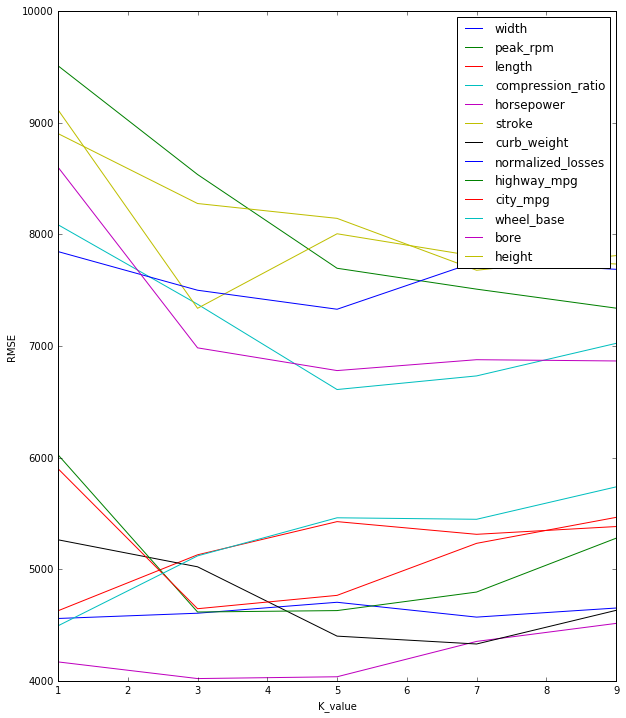

In [404]:
best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

This figure is a bit confusing to look at. A better way is to sort the values of the best_features which contains the features as the key and the average RMSE as the values.

In [405]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'width',
 'curb_weight',
 'highway_mpg',
 'length',
 'city_mpg',
 'wheel_base',
 'compression_ratio',
 'bore',
 'normalized_losses',
 'stroke',
 'peak_rpm',
 'height']

Now we know which features have the lowest amount of error, we can begin applying the function to multiple features at once.

In [406]:
def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [407]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', cars_numeric)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', cars_numeric)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', cars_numeric)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', cars_numeric)

In [408]:
k_rmse_features

{'best_five_rmse': 3533.7489988020734,
 'best_four_rmse': 3404.6909417321376,
 'best_three_rmse': 3214.9121121904577,
 'best_two_rmse': 3631.3521482982746}

Let looks like using the best three features gave us the lowest RMSE.

Now, let's try varying the K values. We can further tune our machine learning model by finding the optimal K value to use.

In [409]:
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [410]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = list(range(1,25))
features = [best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', cars_numeric, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', cars_numeric, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', cars_numeric, k)

In [411]:
feature_k_rmse2

{'best_five_features': {1: 2925.271682398335,
  2: 3052.8623032449823,
  3: 3142.306197305374,
  4: 3461.561181031581,
  5: 3533.7489988020734,
  6: 3374.173588712601,
  7: 3375.877721539395,
  8: 3324.876540782833,
  9: 3312.502627933449,
  10: 3366.851324397034,
  11: 3447.2822267103743,
  12: 3496.4998131087186,
  13: 3547.2160454903924,
  14: 3615.6147456955036,
  15: 3579.8430331574878,
  16: 3678.503216850985,
  17: 3750.96940429519,
  18: 3815.3901236791603,
  19: 3851.386198466123,
  20: 3939.9382237297746,
  21: 3975.041007876702,
  22: 4005.3349453198225,
  23: 4054.671493676685,
  24: 4106.550851309336},
 'best_four_features': {1: 2870.800286876242,
  2: 2924.256000834373,
  3: 3217.2983830519292,
  4: 3392.3729838615423,
  5: 3404.6909417321376,
  6: 3532.1939129716366,
  7: 3523.454893817346,
  8: 3405.9189129672363,
  9: 3400.2247346580157,
  10: 3549.4612599577126,
  11: 3539.83054253496,
  12: 3562.1876094096256,
  13: 3675.4563993723814,
  14: 3770.166928307887,
  15: 

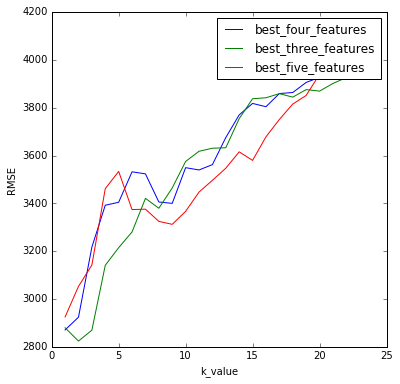

In [412]:
# create plot from the dictionary
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

From the chart above, we can see that choosing the best three features with a K value of 2 will give us the RMSE of 2824. That is it for now though, the goal of this project is to explore the fundamentals of machine learning.

Learning Summary
Concepts explored: pandas, data cleaning, features engineering, k-nearest neighbors, hyperparameter tuning, RMSE
Functions and methods used: .read_csv(), .replace(), .drop(), .astype(), isnull().sum(), .min(), .max(), .mean(), .permutation(), .reindex(), .iloc[], .fit(), .predict(), mean_squared_error(), .Series(), .sort_values(), .plot(), .legend()

In [413]:
best_features.items()

dict_items([('width', 4618.910559617357), ('peak_rpm', 8119.365233100782), ('bore', 7222.472445325499), ('compression_ratio', 7166.0735987331045), ('city_mpg', 5202.40900297338), ('curb_weight', 4730.075815236338), ('height', 8163.346265875196), ('normalized_losses', 7624.407150803995), ('stroke', 8000.240466568112), ('horsepower', 4219.377860395267), ('length', 5176.394903761173), ('highway_mpg', 5069.469256447656), ('wheel_base', 5252.3924618645415)])